In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import datetime

## 1.1	Data Description

In [2]:
market = pd.read_csv('600006/MarketData20160509.csv')
order = pd.read_csv('600006/OrderQueue20160509.csv')
trans = pd.read_csv('600006/Transaction20160509.csv')
print(market.shape, '\n', market.columns)
print(order.shape, '\n', order.columns)
print(trans.shape, '\n', trans.columns)

(81310, 84) 
 Index(['UpdateTime', 'SecurityID', 'ImageStatus', 'PreCloPrice', 'OpenPrice',
       'HighPrice', 'LowPrice', 'LastPrice', 'ClosePrice', 'InstruStatus',
       'TradNumber', 'TradVolume', 'Turnover', 'TotalBidVol', 'WAvgBidPri',
       'AltWAvgBidPri', 'TotalAskVol', 'WAvgAskPri', 'AltWAvgAskPri',
       'EtfBuyNumber', 'EtfBuyVolume', 'EtfBuyMoney', 'EtfSellNumber',
       'EtfSellVolume', 'ETFSellMoney', 'YieldToMatu', 'TotWarExNum',
       'WarLowerPri', 'WarUpperPri', 'WiDBuyNum', 'WiDBuyVol', 'WiDBuyMon',
       'WiDSellNum', 'WiDSellVol', 'WiDSellMon', 'TotBidNum', 'TotSellNum',
       'MaxBidDur', 'MaxSellDur', 'BidNum', 'SellNum', 'IOPV', 'AskPrice1',
       'AskVolume1', 'AskPrice2', 'AskVolume2', 'AskPrice3', 'AskVolume3',
       'AskPrice4', 'AskVolume4', 'AskPrice5', 'AskVolume5', 'AskPrice6',
       'AskVolume6', 'AskPrice7', 'AskVolume7', 'AskPrice8', 'AskVolume8',
       'AskPrice9', 'AskVolume9', 'AskPrice10', 'AskVolume10', 'BidPrice1',
       'BidVolume1

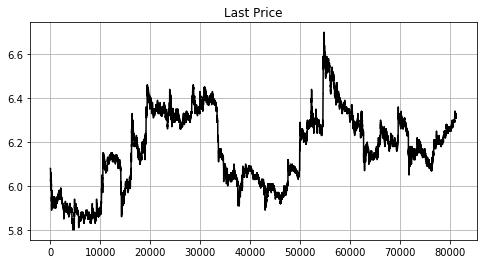

In [3]:
figure, ax = plt.subplots(figsize = (8,4))
ax.grid()
ax.set_title('Last Price')
ax.plot(market['LastPrice'], color = 'black')

In [4]:
hour = pd.DatetimeIndex(market['UpdateTime']).hour
market['DataDate'] = None
day_index = [0]
market.loc[0, 'DataDate'] = pd.Timestamp('2016-05-09')
for i in range(1, len(hour)):
    if hour[i] == 9 and hour[i-1] != 9:
        day_index.append(i)
        market.loc[i, 'DataDate'] = market.loc[day_index[-2], 'DataDate'] + pd.offsets.BDay()
market['DataDate'] = market['DataDate'].fillna(method='ffill')
print(day_index)

[0, 4744, 9209, 14088, 18937, 23818, 28668, 33504, 38338, 42991, 47575, 52343, 57256, 62125, 66896, 71704, 76415]


In [5]:
market1 = market.iloc[day_index[0]:day_index[1],:]
market1

,UpdateTime,SecurityID,ImageStatus,PreCloPrice,OpenPrice,HighPrice,LowPrice,LastPrice,ClosePrice,InstruStatus,...,BidVolume7,BidPrice8,BidVolume8,BidPrice9,BidVolume9,BidPrice10,BidVolume10,LocalTime,SeqNo,DataDate
0,09:25:01.000,600006,1,6.1,0.00,6.08,6.08,6.08,0.00,BETW,...,4400.0,5.98,6800.0,5.97,5900.0,5.96,500.0,09:25:01.619,210,2016-05-09
1,09:25:03.000,600006,3,6.1,6.08,6.08,6.08,6.08,0.00,BETW,...,4400.0,5.98,6800.0,5.97,5900.0,5.96,500.0,09:25:05.290,849,2016-05-09
2,09:26:47.000,600006,1,6.1,6.08,6.08,6.08,6.08,0.00,BETW,...,4400.0,5.98,6800.0,5.97,5900.0,5.96,500.0,09:26:47.634,11302,2016-05-09
3,09:26:55.000,600006,1,6.1,6.08,6.08,6.08,6.08,0.00,BETW,...,4400.0,5.98,6800.0,5.97,5900.0,5.96,500.0,09:27:47.650,16469,2016-05-09
4,09:26:55.000,600006,1,6.1,6.08,6.08,6.08,6.08,0.00,BETW,...,4400.0,5.98,6800.0,5.97,5900.0,5.96,500.0,09:28:47.775,21296,2016-05-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,15:05:13.000,600006,1,6.1,6.08,6.08,5.80,5.83,5.83,ENDTR,...,5600.0,5.75,20300.0,5.74,39300.0,5.73,14200.0,15:25:48.119,5865848,2016-05-09
4740,15:05:13.000,600006,1,6.1,6.08,6.08,5.80,5.83,5.83,ENDTR,...,5600.0,5.75,20300.0,5.74,39300.0,5.73,14200.0,15:26:48.134,5870672,2016-05-09
4741,15:05:13.000,600006,1,6.1,6.08,6.08,5.80,5.83,5.83,ENDTR,...,5600.0,5.75,20300.0,5.74,39300.0,5.73,14200.0,15:27:48.212,5875507,2016-05-09
4742,15:05:13.000,600006,1,6.1,6.08,6.08,5.80,5.83,5.83,ENDTR,...,5600.0,5.75,20300.0,5.74,39300.0,5.73,14200.0,15:28:48.150,5880312,2016-05-09


In [6]:
hour = pd.DatetimeIndex(order['UpdateTime']).hour
order['DataDate'] = None
day_index = [0]
order.loc[0, 'DataDate'] = pd.Timestamp('2016-05-09')
for i in range(1, len(hour)):
    if hour[i] == 9 and hour[i-1] != 9:
        day_index.append(i)
        order.loc[i, 'DataDate'] = order.loc[day_index[-2], 'DataDate'] + pd.offsets.BDay()
order['DataDate'] = order['DataDate'].fillna(method='ffill')
print(day_index)

[0, 9488, 18418, 28176, 37874, 47636, 57336, 67008, 76676, 85982, 95150, 104686, 114512, 124250, 133792, 143408, 152830]


In [7]:
#choose the first trading date
order1 = order.iloc[day_index[0]:day_index[1],:]
order1

,UpdateTime,SecurityID,ImageStatus,Side,NoPriceLevel,PrcLvlOperator,Price,Volume,NumOrders,NoOrders,...,OrderQty44,OrderQty45,OrderQty46,OrderQty47,OrderQty48,OrderQty49,OrderQty50,LocalTime,SeqNo,DataDate
0,09:25:01.000,600006,1,S,1,0.0,6.08,82100.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09:25:01.619,210,2016-05-09
1,09:25:01.000,600006,1,B,1,0.0,6.07,300.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09:25:01.619,210,2016-05-09
2,09:25:03.000,600006,3,S,1,0.0,6.08,82100.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09:25:05.290,849,2016-05-09
3,09:25:03.000,600006,3,B,1,0.0,6.07,300.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09:25:05.290,849,2016-05-09
4,09:26:47.000,600006,1,S,1,0.0,6.08,82100.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09:26:47.634,11302,2016-05-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9483,15:05:13.000,600006,1,B,1,0.0,5.82,73100.0,21.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15:27:48.212,5875507,2016-05-09
9484,15:05:13.000,600006,1,S,1,0.0,5.83,33800.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15:28:48.150,5880312,2016-05-09
9485,15:05:13.000,600006,1,B,1,0.0,5.82,73100.0,21.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15:28:48.150,5880312,2016-05-09
9486,15:05:13.000,600006,1,S,1,0.0,5.83,33800.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15:29:48.244,5885147,2016-05-09


In [8]:
hour = pd.DatetimeIndex(trans['TradTime']).hour
trans['DataDate'] = None
day_index = [0]
trans.loc[0, 'DataDate'] = pd.Timestamp('2016-05-09')
for i in range(1, len(hour)):
    if hour[i] == 9 and hour[i-1] != 9:
        day_index.append(i)
        trans.loc[i, 'DataDate'] = trans.loc[day_index[-2], 'DataDate'] + pd.offsets.BDay()
trans['DataDate'] = trans['DataDate'].fillna(method='ffill')
print(day_index)

[0, 12265, 18769, 33772, 50281, 67709, 82867, 95698, 110556, 118231, 124803, 144423, 175642, 191122, 203249, 214519, 225132]


In [9]:
#choose the first trading date
trans1 = trans.iloc[day_index[0]:day_index[1],:]
trans1

,DataStatus,TradeIndex,TradeChan,SecurityID,TradTime,TradPrice,TradVolume,TradeMoney,TradeBuyNo,TradeSellNo,TradeBSFlag,LocalTime,SeqNo,DataDate
0,0,1035,3,600006,09:25:00.800,6.08,2800.0,17024.0,28717,92359,N,09:25:04.306,10416,2016-05-09
1,0,1036,3,600006,09:25:00.800,6.08,100.0,608.0,28717,56953,N,09:25:04.306,10417,2016-05-09
2,0,1037,3,600006,09:25:00.800,6.08,100.0,608.0,28717,20376,N,09:25:04.306,10418,2016-05-09
3,0,1038,3,600006,09:25:00.800,6.08,3300.0,20064.0,28717,50858,N,09:25:04.306,10419,2016-05-09
4,0,1039,3,600006,09:25:00.800,6.08,4000.0,24320.0,28717,88076,N,09:25:04.306,10420,2016-05-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,0,2065854,3,600006,14:59:58.020,5.83,100.0,583.0,3091650,3079044,B,15:00:01.072,10715071,2016-05-09
12261,0,2065918,3,600006,14:59:58.440,5.83,1000.0,5830.0,3091753,3079044,B,15:00:01.072,10715135,2016-05-09
12262,0,2066128,3,600006,14:59:59.430,5.82,800.0,4656.0,3070164,3092004,S,15:00:01.134,10715345,2016-05-09
12263,0,2066129,3,600006,14:59:59.430,5.82,200.0,1164.0,3072203,3092004,S,15:00:01.134,10715346,2016-05-09


In [10]:
# plot the order book and the transactions
time1 = market1['UpdateTime']
time2 = order1['UpdateTime']
time3 = trans1['TradTime']
time1 = [pd.to_datetime(time1[i]).time() for i in range(len(time1))]
time2 = [pd.to_datetime(time2[i]).time() for i in range(len(time2))]
time3 = [pd.to_datetime(time3[i]).time() for i in range(len(time3))]

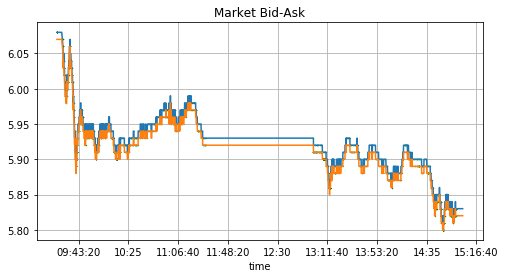

In [11]:
figure, ax = plt.subplots(figsize = (8,4))
ax.grid()
ax.set_title('Market Bid-Ask')
ax.plot(time1, market1.loc[:,'AskPrice1'])
ax.plot(time1, market1.loc[:,'BidPrice1'])
# ax.plot(time1, market1.loc[:,'AskPrice2'])
# ax.plot(time1, market1.loc[:,'BidPrice1'])
ax.scatter(time3, trans1.loc[:,'TradPrice'], s = 0.1, marker = '.', c =  'green')

In [12]:
index1 = set(np.where(np.array(time1) < datetime.time(9, 36, 1))[0]) & set(np.where(np.array(time1) >= datetime.time(9, 30, 1))[0])
index3 = set(np.where(np.array(time3) < datetime.time(9, 36, 1))[0]) & set(np.where(np.array(time3) >= datetime.time(9, 30, 1))[0])
morning1 = [time1[i] for i in list(index1)]
morning3 = [time3[i] for i in list(index3)]

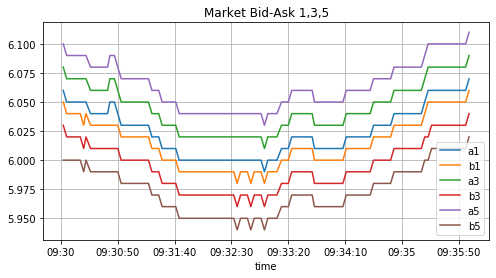

In [13]:
figure, ax = plt.subplots(figsize = (8,4))
ax.grid()
ax.set_title('Market Bid-Ask 1,3,5')
ax.plot(morning1, market1.iloc[list(index1),np.where(market1.columns == 'AskPrice1')[0][0]])
ax.plot(morning1, market1.iloc[list(index1),np.where(market1.columns == 'BidPrice1')[0][0]])
ax.plot(morning1, market1.iloc[list(index1),np.where(market1.columns == 'AskPrice3')[0][0]])
ax.plot(morning1, market1.iloc[list(index1),np.where(market1.columns == 'BidPrice3')[0][0]])
ax.plot(morning1, market1.iloc[list(index1),np.where(market1.columns == 'AskPrice5')[0][0]])
ax.plot(morning1, market1.iloc[list(index1),np.where(market1.columns == 'BidPrice5')[0][0]])
ax.legend(['a1','b1','a3','b3','a5','b5'])

In [14]:
index1 = set(np.where(np.array(time1) < datetime.time(9, 31, 1))[0]) & set(np.where(np.array(time1) >= datetime.time(9, 30, 1))[0])
index3 = set(np.where(np.array(time3) < datetime.time(9, 31, 1))[0]) & set(np.where(np.array(time3) >= datetime.time(9, 30, 1))[0])
morning1 = [time1[i] for i in list(index1)]
morning3 = [time3[i] for i in list(index3)]

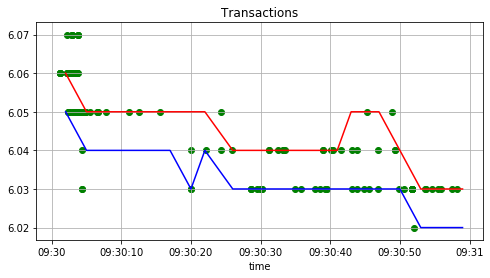

In [15]:
figure, ax = plt.subplots(figsize = (8,4))
ax.grid()
ax.set_title('Transactions')
ax.plot(morning1, market1.iloc[list(index1),np.where(market1.columns == 'AskPrice1')[0][0]],'r')
ax.plot(morning1, market1.iloc[list(index1),np.where(market1.columns == 'BidPrice1')[0][0]],'b')
ax.scatter(morning3, trans1.iloc[list(index3), np.where(trans1.columns == 'TradPrice')[0][0]], c='green')

In [16]:
index1 = set(np.where(np.array(time1) < datetime.time(15, 0, 1))[0]) & set(np.where(np.array(time1) >= datetime.time(14, 55, 1))[0])
index3 = set(np.where(np.array(time3) < datetime.time(15, 0, 1))[0]) & set(np.where(np.array(time3) >= datetime.time(14, 55, 1))[0])
evening1 = [time1[i] for i in list(index1)]
evening3 = [time3[i] for i in list(index3)]

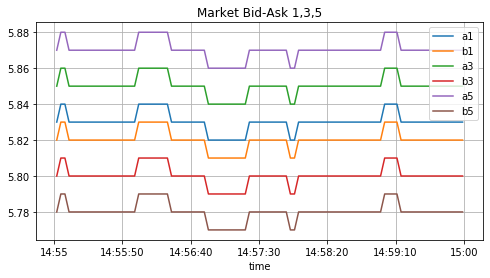

In [17]:
figure, ax = plt.subplots(figsize = (8,4))
ax.grid()
ax.set_title('Market Bid-Ask 1,3,5')
ax.plot(evening1, market1.iloc[list(index1),np.where(market1.columns == 'AskPrice1')[0][0]])
ax.plot(evening1, market1.iloc[list(index1),np.where(market1.columns == 'BidPrice1')[0][0]])
ax.plot(evening1, market1.iloc[list(index1),np.where(market1.columns == 'AskPrice3')[0][0]])
ax.plot(evening1, market1.iloc[list(index1),np.where(market1.columns == 'BidPrice3')[0][0]])
ax.plot(evening1, market1.iloc[list(index1),np.where(market1.columns == 'AskPrice5')[0][0]])
ax.plot(evening1, market1.iloc[list(index1),np.where(market1.columns == 'BidPrice5')[0][0]])
ax.legend(['a1','b1','a3','b3','a5','b5'])

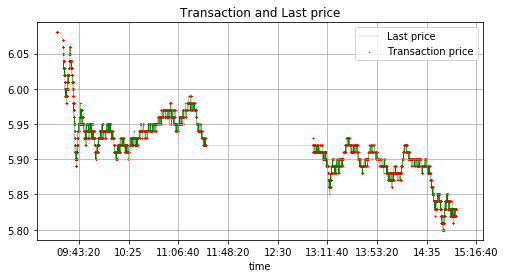

In [18]:
figure, ax = plt.subplots(figsize = (8,4))
ax.grid()
ax.set_title('Transaction and Last price')
ax.plot(time1, market1.loc[:,'LastPrice'], linewidth = 0.2, color = 'green')
# ax.plot(time1, market1.loc[:,'BidPrice1'])
# ax.plot(time1, market1.loc[:,'AskPrice2'])
# ax.plot(time1, market1.loc[:,'BidPrice1'])
ax.scatter(time3, trans1.loc[:,'TradPrice'], s = 1, marker = '.', c =  'red')
ax.legend(['Last price', 'Transaction price'])

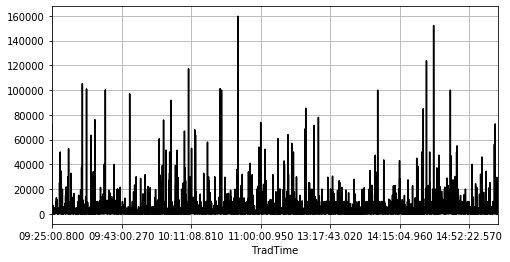

In [19]:
trans1.loc[:,['TradTime','TradVolume']].groupby(['TradTime']).sum().iloc[:,0].plot(color = 'black', grid = True, figsize = (8,4))

## 1.2 Normality Test and Information Driven Bars

In [21]:
from copy import deepcopy
trans_save = deepcopy(trans)
market_save = deepcopy(market)
order_save = deepcopy(order)

In [22]:
trans = deepcopy(trans_save)
market = deepcopy(market_save)
order = deepcopy(order_save)
# first we need to combine market and transaction information
trans['DateTime'] = trans['DataDate'] + pd.to_timedelta(trans['TradTime'])
trans.drop(['DataDate','TradTime'], axis = 1, inplace = True)
trans.index = pd.DatetimeIndex(trans['DateTime'])
trans = trans.resample('1s').sum()
trans = trans.iloc[~(trans==0).all(axis=1).values, :]

market['DateTime'] = market['DataDate'] + pd.to_timedelta(market['UpdateTime'])
market.drop(['DataDate','UpdateTime'], axis = 1, inplace = True)
market.index = pd.DatetimeIndex(market['DateTime'])
# market = market.resample('1s').sum()
# market = market.iloc[~(market==0).all(axis=1).values, :]

order['DateTime'] = order['DataDate'] + pd.to_timedelta(order['UpdateTime'])
order.drop(['DataDate','UpdateTime'], axis = 1, inplace = True)
order.index = pd.DatetimeIndex(order['DateTime'])
# order = order.resample('1s').sum()
# order = order.iloc[~(order==0).all(axis=1).values, :]

In [23]:
# trans.drop(['DateTime'], axis = 1, inplace = True)
market.drop(['DateTime'], axis = 1, inplace = True)
order.drop(['DateTime'], axis = 1, inplace = True)
# agg_trans = trans.groupby(['DateTime', 'TradPrice'])['TradVolume'].sum()
# agg_trans = agg_trans.reset_index()
# agg_trans.rename(columns={"TradVolume":"TransVolume"}, inplace = True)
# agg_trans.set_index('DateTime',inplace = True)

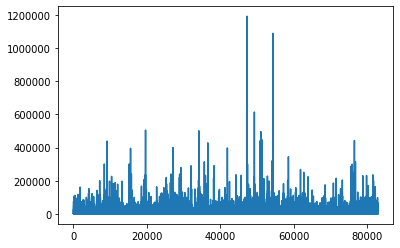

In [24]:
plt.plot(trans['TradVolume'].values)

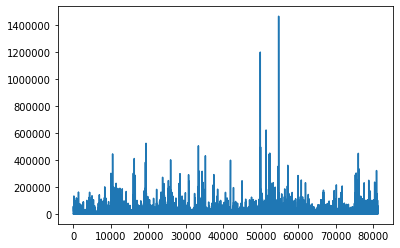

In [25]:
plt.plot(market['TradVolume'].diff()[market['TradVolume'].diff()> -1e3].values)
# this proofs than the volume in market data is accumulated transaction orders in the transactions
# but there are some differences

In [27]:
agg_market = pd.merge(market, trans, how = 'inner', on = 'DateTime')
agg_market # nan means there is no transactions

,SecurityID_x,ImageStatus,PreCloPrice,OpenPrice,HighPrice,LowPrice,LastPrice,ClosePrice,InstruStatus,TradNumber,...,DataStatus,TradeIndex,TradeChan,SecurityID_y,TradPrice,TradVolume_y,TradeMoney,TradeBuyNo,TradeSellNo,SeqNo_y
DateTime,,,,,,,,,,,,,,,,,,,,,
2016-05-09 09:30:02,600006,3,6.10,6.08,6.08,6.06,6.06,0.0,TRADE,63,...,0,349585,54,10800108,109.09,15900.0,96396.0,1541518,1816475,1821832
2016-05-09 09:30:05,600006,3,6.10,6.08,6.08,6.05,6.05,0.0,TRADE,106,...,0,65576,6,1200012,12.10,2500.0,15125.0,281798,249290,266368
2016-05-09 09:30:11,600006,3,6.10,6.08,6.08,6.03,6.05,0.0,TRADE,121,...,0,34167,3,600006,6.05,5000.0,30250.0,144407,124645,159057
2016-05-09 09:30:22,600006,3,6.10,6.08,6.08,6.03,6.04,0.0,TRADE,128,...,0,36182,3,600006,6.04,300.0,1812.0,147308,147060,168916
2016-05-09 09:30:29,600006,3,6.10,6.08,6.08,6.03,6.03,0.0,TRADE,134,...,0,75887,6,1200012,12.06,7000.0,42210.0,298398,299737,353606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-31 14:59:40,600006,3,6.09,6.07,6.34,6.07,6.32,0.0,TRADE,16139,...,0,12741370,15,3000030,31.60,5500.0,34760.0,19524838,19516617,58994900
2016-05-31 14:59:49,600006,3,6.09,6.07,6.34,6.07,6.32,0.0,TRADE,16179,...,0,5103647,6,1200012,12.64,1400.0,8848.0,7818464,7816233,23633611
2016-05-31 14:59:52,600006,3,6.09,6.07,6.34,6.07,6.32,0.0,TRADE,16190,...,0,2553068,3,600006,6.32,900.0,5688.0,3910132,3910359,11822975


In [28]:
agg_market['TradVol'] = agg_market['TradVolume_y'].diff()
agg_market['TradVol'][agg_market['TradVol']< -1e3] = 0
agg_market['y'] = agg_market['LastPrice'].pct_change(1)
agg_market.y.fillna(0, inplace = True)

D:\ProgramFiles\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


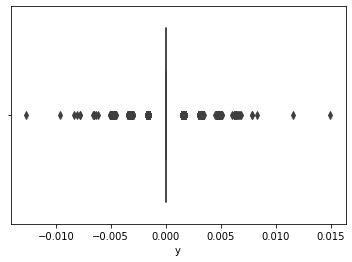

In [29]:
# the return seems to be aymatric distributed, but we still need to get rid of some outliers
import seaborn as sns
sns.boxplot(agg_market.y)

D:\ProgramFiles\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


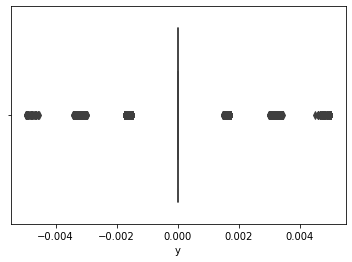

In [31]:
agg_market.y[abs(agg_market.y) > 0.005] = 0.005
sns.boxplot(agg_market.y)

In [93]:
df = market.loc[:,['OpenPrice', 'HighPrice','LowPrice', 'LastPrice', 'ClosePrice','TradVolume', 'Turnover', 
                         'TotalBidVol', 'WAvgBidPri', 'AltWAvgBidPri', 'TotalAskVol', 'WAvgAskPri', 'AltWAvgAskPri']]
df['TradVol'] = df['TradVolume'].diff()
df['TradVol'][df['TradVol']< -1e3] = 0
df.drop(['TradVolume'], axis = 1, inplace = True)

In [94]:
# we need the count of transactions
trans = deepcopy(trans_save)
trans['DateTime'] = trans['DataDate'] + pd.to_timedelta(trans['TradTime'])
trans.drop(['DataDate','TradTime'], axis = 1, inplace = True)
trans.index = pd.DatetimeIndex(trans['DateTime'])
trans['count'] = 1
trans = trans.resample('1s').sum()
trans = trans.iloc[~(trans==0).all(axis=1).values, :]
df = pd.merge(df, trans['count'], on = 'DateTime')
df['Amount'] = df['LastPrice'] * df['TradVol']
df

,OpenPrice,HighPrice,LowPrice,LastPrice,ClosePrice,Turnover,TotalBidVol,WAvgBidPri,AltWAvgBidPri,TotalAskVol,WAvgAskPri,AltWAvgAskPri,TradVol,count,Amount
DateTime,,,,,,,,,,,,,,,
2016-05-09 09:30:02,6.08,6.08,6.06,6.06,0.0,4.789790e+05,312300.0,5.823,0.0,935400.0,6.371,0.0,6900.0,18,41814.0
2016-05-09 09:30:05,6.08,6.08,6.05,6.05,0.0,6.819480e+05,453800.0,5.825,0.0,1249900.0,6.346,0.0,33500.0,2,202675.0
2016-05-09 09:30:11,6.08,6.08,6.03,6.05,0.0,7.527190e+05,500200.0,5.817,0.0,1396700.0,6.344,0.0,0.0,1,0.0
2016-05-09 09:30:22,6.08,6.08,6.03,6.04,0.0,8.035060e+05,501600.0,5.816,0.0,1430000.0,6.337,0.0,300.0,1,1812.0
2016-05-09 09:30:29,6.08,6.08,6.03,6.03,0.0,8.366870e+05,492600.0,5.813,0.0,1415700.0,6.341,0.0,4000.0,2,24120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-31 14:59:40,6.07,6.34,6.07,6.32,0.0,1.823739e+08,4532317.0,6.100,0.0,7358767.0,6.542,0.0,5800.0,5,36656.0
2016-05-31 14:59:49,6.07,6.34,6.07,6.32,0.0,1.828998e+08,4526317.0,6.100,0.0,7292467.0,6.544,0.0,100.0,2,632.0
2016-05-31 14:59:52,6.07,6.34,6.07,6.32,0.0,1.829985e+08,4525917.0,6.100,0.0,7292667.0,6.544,0.0,15600.0,1,98592.0


Text(0.5, 1.0, 'Time Bar')

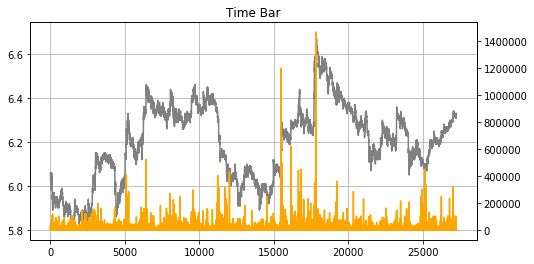

In [57]:
# plot time bar
fig, ax = plt.subplots(figsize= (8,4))
ax.grid()
ax2 = ax.twinx()
ax.plot(df.LastPrice.values, 'gray')
ax2.plot(df.TradVol.values, 'orange')
ax.set_title('Time Bar')

In [77]:
# calculate bars by indexing
from tqdm import tqdm
def find_index(df, target_column, unit):
    t = df[target_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= unit:
            idx.append(i)
            ts = 0
            continue
    return idx

def df_bar(df, price_column, unit):
    idx = find_index(df, price_column, unit)
    return df.iloc[idx,:].drop_duplicates()

In [78]:
# calculate tick bar
tick_unit = 500
tick_idx = find_index(df, 'count', tick_unit)
tick_df = df_bar(df, 'count', tick_unit)
tick_df.shape


100%|███████████████████████████████████████████████████████████████████████| 27265/27265 [00:00<00:00, 1951396.66it/s]

(158, 14)

Text(0.5, 1.0, 'Tick Bar')

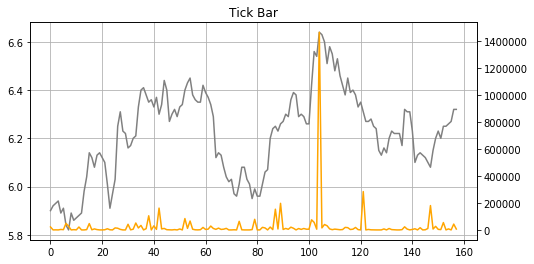

In [107]:
# plot tick bar
fig, ax = plt.subplots(figsize= (8,4))
ax.grid()
ax2 = ax.twinx()
ax.plot(tick_df.LastPrice.values, 'gray')
ax2.plot(tick_df.TradVol.values, 'orange')
ax.set_title('Tick Bar')

Text(0.5, 1.0, 'Price and Tick Bar')

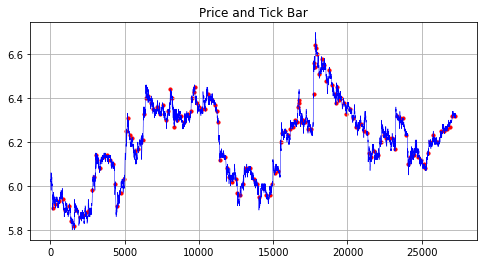

In [127]:
# plot time & tick bar
fig, ax = plt.subplots(figsize= (8,4))
ax.grid()
ax.plot(df.LastPrice.values, 'blue', linewidth = 0.5)
ax.scatter(tick_idx, tick_df.LastPrice.values, s = 10, c='red')
ax.set_title('Price and Tick Bar')

In [86]:
# calculate volume bar
volume_unit = 1000000
volume_idx = find_index(df, 'TradVol', volume_unit)
volume_df = df_bar(df, 'TradVol', volume_unit)
volume_df.shape


100%|███████████████████████████████████████████████████████████████████████| 27265/27265 [00:00<00:00, 2278041.80it/s]

(222, 14)

Text(0.5, 1.0, 'volume Bar')

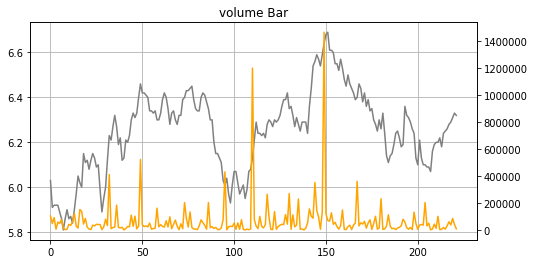

In [108]:
# plot volume bar
fig, ax = plt.subplots(figsize= (8,4))
ax.grid()
ax2 = ax.twinx()
ax.plot(volume_df.LastPrice.values, 'gray')
ax2.plot(volume_df.TradVol.values, 'orange')
ax.set_title('volume Bar')

Text(0.5, 1.0, 'Price and Volume Bar')

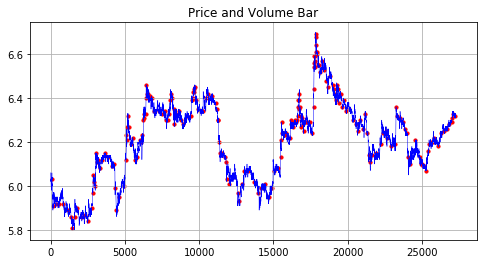

In [126]:
# plot time & volume bar
fig, ax = plt.subplots(figsize= (8,4))
ax.grid()
ax.plot(df.LastPrice.values, 'blue',linewidth = 0.5)
ax.scatter(volume_idx, volume_df.LastPrice.values, s = 10, c='red')
#ax.scatter(tick_idx, tick_df.LastPrice.values, c='green')
ax.set_title('Price and Volume Bar')

In [102]:
# calculate dollar bar
dollar_unit = 10000000
dollar_idx = find_index(df, 'Amount', dollar_unit)
dollar_df = df_bar(df, 'Amount', dollar_unit)
dollar_df.shape


100%|███████████████████████████████████████████████████████████████████████| 27265/27265 [00:00<00:00, 2485388.56it/s]

(140, 15)

Text(0.5, 1.0, 'Dollar Bar')

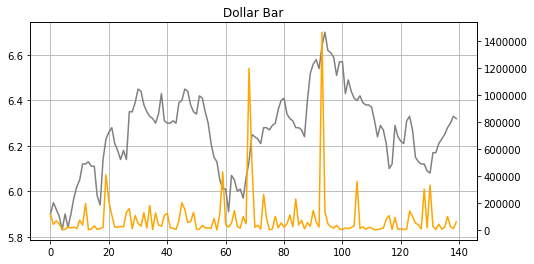

In [128]:
# plot dollar bar
fig, ax = plt.subplots(figsize= (8,4))
ax.grid()
ax2 = ax.twinx()
ax.plot(dollar_df.LastPrice.values, 'gray')
ax2.plot(dollar_df.TradVol.values, 'orange')
ax.set_title('Dollar Bar')

Text(0.5, 1.0, 'Price and dollar Bar')

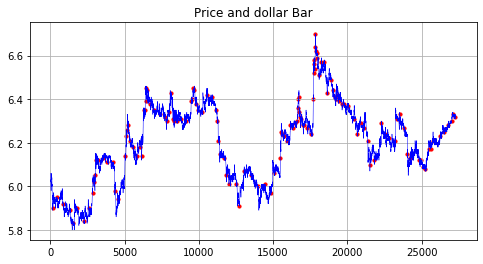

In [124]:
# plot time & volume bar
fig, ax = plt.subplots(figsize= (8,4))
ax.grid()
ax.plot(df.LastPrice.values, 'blue', linewidth = 0.5)
#ax.scatter(volume_idx, volume_df.LastPrice.values, c='red')
ax.scatter(dollar_idx, dollar_df.LastPrice.values, s = 10, c='red')
ax.set_title('Price and dollar Bar')

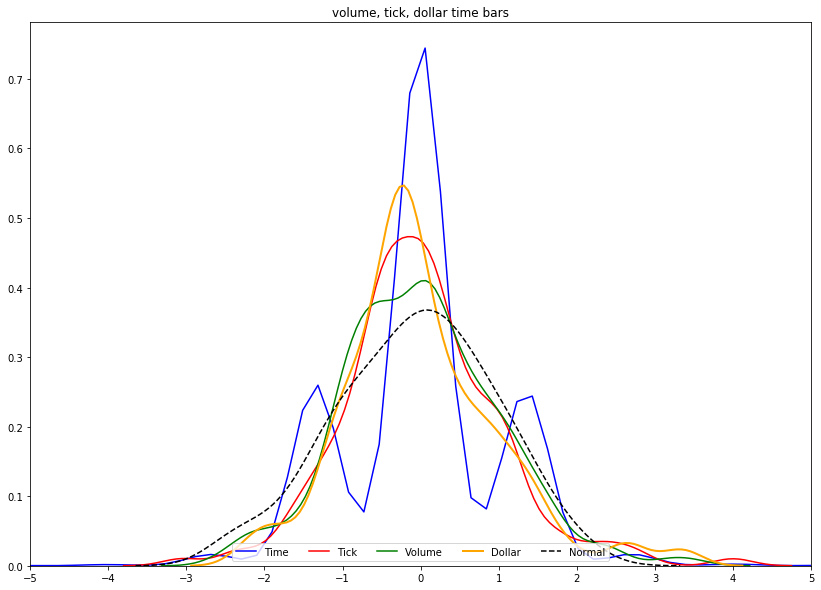

In [131]:
# compare different bars -- from distribution
# Calculate the stock returns
time_diff = df['LastPrice'].pct_change(1)
tick_diff = tick_df['LastPrice'].pct_change(1)
volume_diff = volume_df['LastPrice'].pct_change(1)
dollar_diff = dollar_df['LastPrice'].pct_change(1)

# Standardize the data
time_standard = (time_diff - time_diff.mean()) / time_diff.std()
tick_standard = (tick_diff - tick_diff.mean()) / tick_diff.std()
volume_standard = (volume_diff - volume_diff.mean()) / volume_diff.std()
dollar_standard = (dollar_diff - dollar_diff.mean()) / dollar_diff.std()

# Plot the Distributions
plt.figure(figsize=(14,10))
sns.kdeplot(time_standard, label="Time", bw=0.30, color='blue')
sns.kdeplot(tick_standard, label="Tick", bw=0.25, color='red')
sns.kdeplot(volume_standard, label="Volume", bw=0.25, color='green')
sns.kdeplot(dollar_standard, label="Dollar", bw=0.25, linewidth=2, color='orange')

sns.kdeplot(np.random.normal(size=len(volume_diff)), label="Normal", color='black', linestyle="--")

plt.xticks(range(-5, 6))
plt.legend(loc=8, ncol=5)
plt.title('volume, tick, dollar time bars')
plt.xlim(-5, 5)
plt.show()

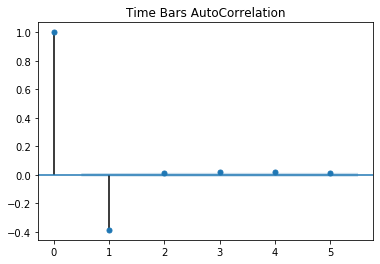

In [165]:
# compare different bars -- from auto-correlation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(np.diff(np.log(df.LastPrice.values)), lags=5)
plt.title('Time Bars AutoCorrelation')
plt.show()

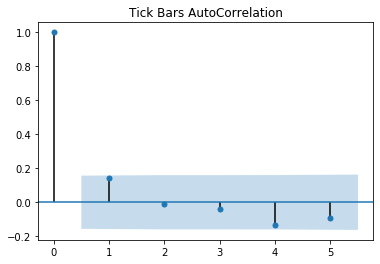

In [166]:
# compare different bars -- from auto-correlation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(np.diff(np.log(tick_df.LastPrice.values)), lags=5)
plt.title('Tick Bars AutoCorrelation')
plt.show()

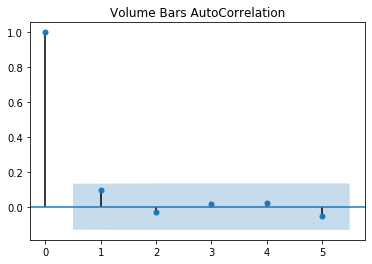

In [167]:
# compare different bars -- from auto-correlation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(np.diff(np.log(volume_df.LastPrice.values)), lags=5)
plt.title('Volume Bars AutoCorrelation')
plt.show()

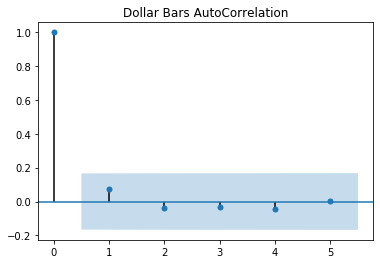

In [168]:
# compare different bars -- from auto-correlation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(np.diff(np.log(dollar_df.LastPrice.values)), lags=5)
plt.title('Dollar Bars AutoCorrelation')
plt.show()

In [211]:
# based on previous analysis, we use volume bars to get data sample
def extract_data(date, stock):
    
    market = pd.read_csv(stock + '/MarketData' + date + '.csv')
    order = pd.read_csv(stock + '/OrderQueue' + date + '.csv')
    trans = pd.read_csv(stock + '/Transaction' + date + '.csv')
    # processing data
    hour = pd.DatetimeIndex(market['UpdateTime']).hour
    market['DataDate'] = None
    day_index = [0]
    market.loc[0, 'DataDate'] = pd.Timestamp(date)
    for i in range(1, len(hour)):
        if hour[i] == 9 and hour[i-1] != 9:
            day_index.append(i)
            market.loc[i, 'DataDate'] = market.loc[day_index[-2], 'DataDate'] + pd.offsets.BDay()
    market['DataDate'] = market['DataDate'].fillna(method='ffill')

    hour = pd.DatetimeIndex(order['UpdateTime']).hour
    order['DataDate'] = None
    day_index = [0]
    order.loc[0, 'DataDate'] = pd.Timestamp(date)
    for i in range(1, len(hour)):
        if hour[i] == 9 and hour[i-1] != 9:
            day_index.append(i)
            order.loc[i, 'DataDate'] = order.loc[day_index[-2], 'DataDate'] + pd.offsets.BDay()
    order['DataDate'] = order['DataDate'].fillna(method='ffill')

    hour = pd.DatetimeIndex(trans['TradTime']).hour
    trans['DataDate'] = None
    day_index = [0]
    trans.loc[0, 'DataDate'] = pd.Timestamp(date)
    for i in range(1, len(hour)):
        if hour[i] == 9 and hour[i-1] != 9:
            day_index.append(i)
            trans.loc[i, 'DataDate'] = trans.loc[day_index[-2], 'DataDate'] + pd.offsets.BDay()
    trans['DataDate'] = trans['DataDate'].fillna(method='ffill')
    
    # set index
    trans['DateTime'] = trans['DataDate'] + pd.to_timedelta(trans['TradTime'])
    trans.drop(['DataDate','TradTime'], axis = 1, inplace = True)
    trans.index = pd.DatetimeIndex(trans['DateTime'])
    trans = trans.resample('1s').sum()
    trans = trans.iloc[~(trans==0).all(axis=1).values, :]
    market['DateTime'] = market['DataDate'] + pd.to_timedelta(market['UpdateTime'])
    market.drop(['DataDate','UpdateTime'], axis = 1, inplace = True)
    market.index = pd.DatetimeIndex(market['DateTime'])
    order['DateTime'] = order['DataDate'] + pd.to_timedelta(order['UpdateTime'])
    order.drop(['DataDate','UpdateTime'], axis = 1, inplace = True)
    order.index = pd.DatetimeIndex(order['DateTime'])
    market.drop(['DateTime'], axis = 1, inplace = True)
    order.drop(['DateTime'], axis = 1, inplace = True)
    market['TradVol'] = market['TradVolume'].diff()
    market['TradVol'][market['TradVol']< -1e3] = 0
    market.drop(['TradVolume'], axis = 1, inplace = True)
    
    order = order.loc[:,['Price', 'Volume', 'NumOrders', 'NoOrders', 'OrderQty1', 'OrderQty2',
       'OrderQty3', 'OrderQty4', 'OrderQty5', 'OrderQty6', 'OrderQty7',
       'OrderQty8', 'OrderQty9', 'OrderQty10']]
    trans = trans.loc[:,[ 'TradPrice', 'TradVolume', 'TradeMoney', 'TradeBuyNo', 'TradeSellNo']]
    
    agg_market = pd.merge(market.groupby('DateTime').sum(), order.groupby('DateTime').sum(), on = 'DateTime')
    agg_market = pd.merge(agg_market, trans.groupby('DateTime').sum(), on = 'DateTime')
    return agg_market

In [212]:
df = extract_data('20160509', '600006')

D:\ProgramFiles\anaconda\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [217]:
df['AskPrice1'].describe()

count    27265.000000
mean         6.200522
std          0.173662
min          5.810000
25%          6.080000
50%          6.220000
75%          6.330000
max          6.700000
Name: AskPrice1, dtype: float64

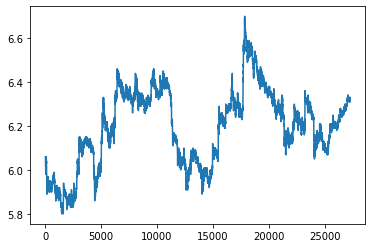

In [218]:
plt.plot(df.LastPrice.values)

In [219]:
df.to_csv('raw_data.csv')